In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
ds=pd.read_csv("startup_data.csv")
ds

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
x= ds[['R&D Spend','Administration','Marketing Spend','State']]
y=ds[['Profit']]

In [5]:
y

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94
5,156991.12
6,156122.51
7,155752.60
8,152211.77
9,149759.96


In [6]:
ds['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [7]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
encoded_data=ohe.fit_transform(x[['State']])

column_names=ohe.get_feature_names_out(['State'])
encoded_df=pd.DataFrame(encoded_data,columns=column_names)

x=pd.concat([x,encoded_df],axis=1)
x=x.drop(columns=['State'])
x

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0.0,0.0,1.0
1,162597.70,151377.59,443898.53,1.0,0.0,0.0
2,153441.51,101145.55,407934.54,0.0,1.0,0.0
3,144372.41,118671.85,383199.62,0.0,0.0,1.0
4,142107.34,91391.77,366168.42,0.0,1.0,0.0
5,131876.90,99814.71,362861.36,0.0,0.0,1.0
6,134615.46,147198.87,127716.82,1.0,0.0,0.0
7,130298.13,145530.06,323876.68,0.0,1.0,0.0
8,120542.52,148718.95,311613.29,0.0,0.0,1.0
9,123334.88,108679.17,304981.62,1.0,0.0,0.0


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [9]:
y_train

,Profit
32,97427.84
39,81005.76
21,111313.02
36,90708.19
19,122776.86
42,71498.49
49,14681.40
26,105733.54
22,110352.25
13,134307.35


In [10]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [11]:
data=[100000,100000,100000,1,0,0]
columns=x.columns
myinput=pd.DataFrame(columns=columns, data=[data])
result=reg.predict(myinput)
result

array([[128931.37715838]])

In [12]:
y_pred = reg.predict(x_test)
y_pred

array([[114664.41715868],
       [ 90593.1553162 ],
       [ 75692.84151575],
       [ 70221.88679651],
       [179790.25514872],
       [171576.9201852 ],
       [ 49753.58752028],
       [102276.65888936],
       [ 58649.37795762],
       [ 98272.02561131]])

In [13]:
y_test

,Profit
27,105008.31
35,96479.51
40,78239.91
38,81229.06
2,191050.39
3,182901.99
48,35673.41
29,101004.64
46,49490.75
31,97483.56


In [14]:
from sklearn.metrics import r2_score
score= r2_score(y_test,y_pred)
score

0.9649618042060305

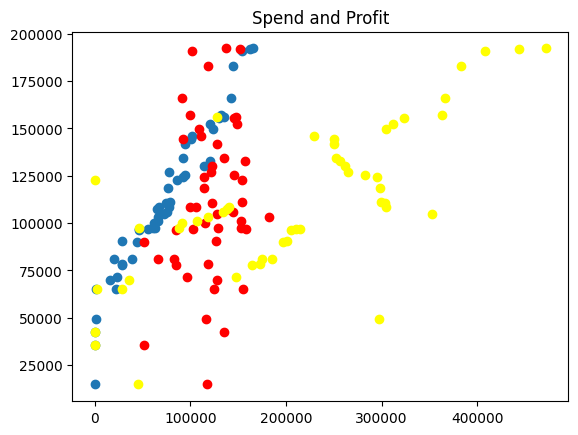

In [15]:
plt.scatter(x['R&D Spend'],y['Profit'])
plt.scatter(x['Administration'],y['Profit'],color='red')
plt.scatter(x['Marketing Spend'],y['Profit'],color='yellow')
plt.title("Spend and Profit")
plt.show()

In [16]:
def make_prediction():
    data=[]
    print("Enter values for the following features :")
    for col in x.columns:
        value=float(input(f"Enter {col}: "))
        data.append(value)
    myinput=pd.DataFrame([data],columns=x.columns)
    result=reg.predict(myinput)
    print(f"\nYour profit must be close to {round(result[0,0])}")


In [17]:
make_prediction()

Enter values for the following features :


Enter R&D Spend:  87
Enter Administration:  98
Enter Marketing Spend:  99
Enter State_California:  65
Enter State_Florida:  97
Enter State_New York:  98



Your profit must be close to 59017
